In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C:/Users/shiti/OneDrive/Desktop/indian_liver_patient.csv')

# Encode categorical variables
categorical_cols = ['Gender']  # Add more columns if there are other categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols)

# Split the dataset into features (symptoms) and labels (diseases)
X = data.drop('Dataset', axis=1)  # Assuming 'Dataset' column represents the disease label
y = data['Dataset']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

# Create the voting ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model)],
    voting='hard'  # Use majority voting
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Ensemble Model Accuracy:", ensemble_accuracy)
  

Random Forest Accuracy: 0.7606837606837606
SVM Accuracy: 0.7435897435897436
Ensemble Model Accuracy: 0.7435897435897436


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C:/Users/shiti/OneDrive/Desktop/indian_liver_patient.csv')

# Encode categorical variables
categorical_cols = ['Gender']  # Add more columns if there are other categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols)

# Split the dataset into features (symptoms) and labels (diseases)
X = data.drop('Dataset', axis=1)  # Assuming 'Dataset' column represents the disease label
y = data['Dataset']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# SVM model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

#ET model
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
et_predictions = et_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("GB Accuracy:", gb_accuracy)
print("ET Accuracy:", et_accuracy)

# Create the voting ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('et', et_model)],
    voting='hard'  # Use majority voting
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Ensemble Model Accuracy:", ensemble_accuracy)

Random Forest Accuracy: 0.7350427350427351
GB Accuracy: 0.717948717948718
ET Accuracy: 0.7606837606837606
Ensemble Model Accuracy: 0.7777777777777778


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C:/Users/shiti/OneDrive/Desktop/indian_liver_patient.csv')

# Encode categorical variables
categorical_cols = ['Gender']  # Add more columns if there are other categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols)

# Split the dataset into features (symptoms) and labels (diseases)
X = data.drop('Dataset', axis=1)  # Assuming 'Dataset' column represents the disease label
y = data['Dataset']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Convert X array back to DataFrame
X = pd.DataFrame(X, columns=data.drop('Dataset', axis=1).columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Extra Trees model
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_model.predict(X_test)
et_predictions = et_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Extra Trees Accuracy:", et_accuracy)

# Create the voting ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('et', et_model)],
    voting='hard'  # Use majority voting
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Ensemble Model Accuracy:", ensemble_accuracy)

Random Forest Accuracy: 0.7350427350427351
Extra Trees Accuracy: 0.7863247863247863
Ensemble Model Accuracy: 0.7692307692307693


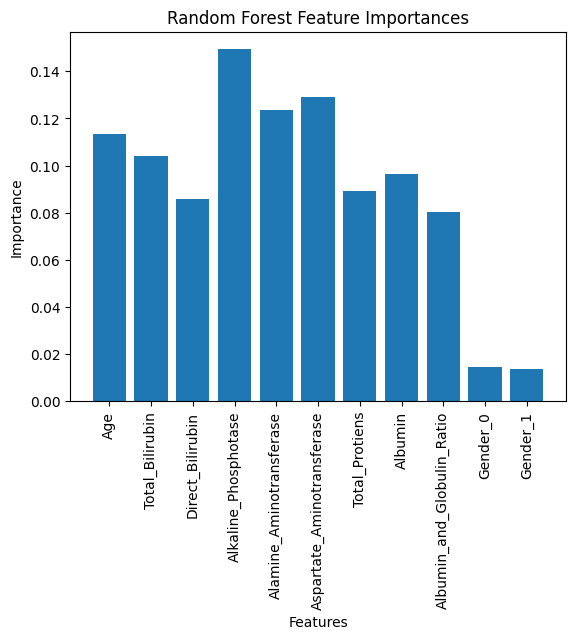

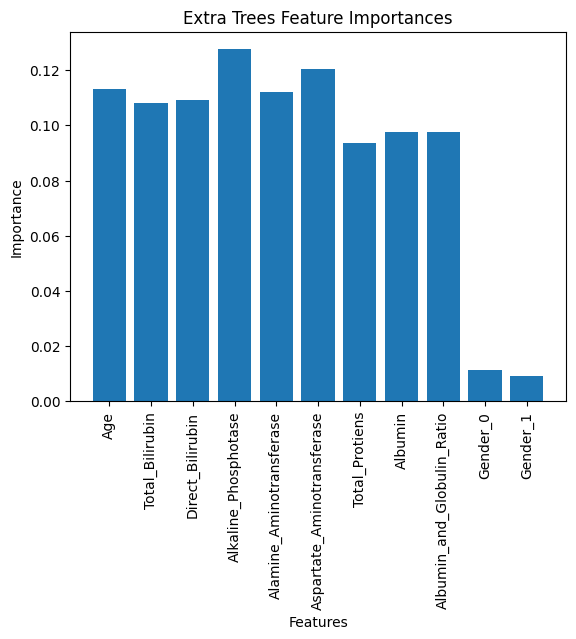

In [16]:
import matplotlib.pyplot as plt

# Visualize feature importances for Random Forest
rf_feature_importances = rf_model.feature_importances_
plt.bar(range(len(rf_feature_importances)), rf_feature_importances)
plt.xticks(range(len(rf_feature_importances)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize feature importances for Extra Trees
et_feature_importances = et_model.feature_importances_
plt.bar(range(len(et_feature_importances)), et_feature_importances)
plt.xticks(range(len(et_feature_importances)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Extra Trees Feature Importances')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv('C:/Users/shiti/OneDrive/Desktop/indian_liver_patient.csv')

categorical_cols = ['Gender']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('Dataset', axis=1)
y = data['Dataset']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("KNN Accuracy:", knn_accuracy)

ensemble_model = VotingClassifier(
    estimators=[('lr', logistic_model), ('dt', decision_tree_model), ('knn', knn_model)],
    voting='hard'  # Use majority voting
)

ensemble_model.fit(X_train, y_train)

ensemble_predictions = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Ensemble Model Accuracy:", ensemble_accuracy)

Logistic Regression Accuracy: 0.7521367521367521
Decision Tree Accuracy: 0.717948717948718
KNN Accuracy: 0.6837606837606838
Ensemble Model Accuracy: 0.7521367521367521


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv('C:/Users/shiti/OneDrive/Desktop/indian_liver_patient.csv')
data['Dataset'] = data['Dataset'].map({1: 0, 2: 1})

categorical_cols = ['Gender']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('Dataset', axis=1)
y = data['Dataset']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X = pd.DataFrame(X, columns=data.drop('Dataset', axis=1).columns)  # Convert X back to DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("KNN Accuracy:", knn_accuracy)

ensemble_model = VotingClassifier(
    estimators=[('lr', logistic_model), ('dt', decision_tree_model), ('knn', knn_model)],
    voting='hard'  # Use majority voting
)

ensemble_model.fit(X_train, y_train)

ensemble_predictions = ensemble_model.predict(X_test)

y_test = y_test.reset_index(drop=True)

print("\n1 is for presence of liver disease, 0 is for absence of liver disease\n")
for i in range(len(y_test)):
    if ensemble_predictions[i] == y_test[i]:
        print("Patient", i+1, "Prediction: Correct (Liver Disease:", ensemble_predictions[i], ")")
    else:
        print("Patient", i+1, "Prediction: Incorrect (Actual:", y_test[i], "Predicted:", ensemble_predictions[i], ")")

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("\nEnsemble Model Accuracy:", ensemble_accuracy)


Logistic Regression Accuracy: 0.7521367521367521
Decision Tree Accuracy: 0.717948717948718
KNN Accuracy: 0.6837606837606838

1 is for presence of liver disease, 0 is for absence of liver disease

Patient 1 Prediction: Correct (Liver Disease: 1 )
Patient 2 Prediction: Correct (Liver Disease: 0 )
Patient 3 Prediction: Correct (Liver Disease: 0 )
Patient 4 Prediction: Correct (Liver Disease: 0 )
Patient 5 Prediction: Correct (Liver Disease: 0 )
Patient 6 Prediction: Correct (Liver Disease: 0 )
Patient 7 Prediction: Correct (Liver Disease: 1 )
Patient 8 Prediction: Incorrect (Actual: 1 Predicted: 0 )
Patient 9 Prediction: Correct (Liver Disease: 1 )
Patient 10 Prediction: Correct (Liver Disease: 0 )
Patient 11 Prediction: Correct (Liver Disease: 1 )
Patient 12 Prediction: Correct (Liver Disease: 0 )
Patient 13 Prediction: Correct (Liver Disease: 1 )
Patient 14 Prediction: Incorrect (Actual: 0 Predicted: 1 )
Patient 15 Prediction: Correct (Liver Disease: 0 )
Patient 16 Prediction: Correct (

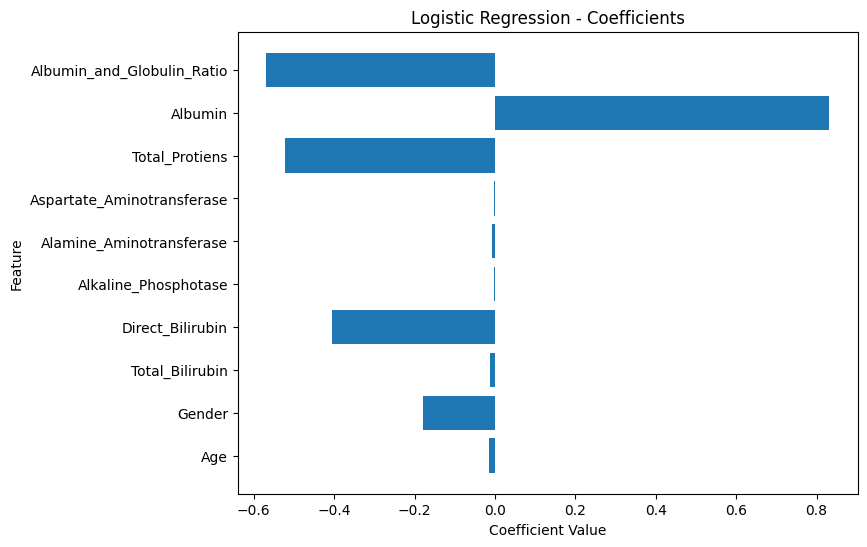

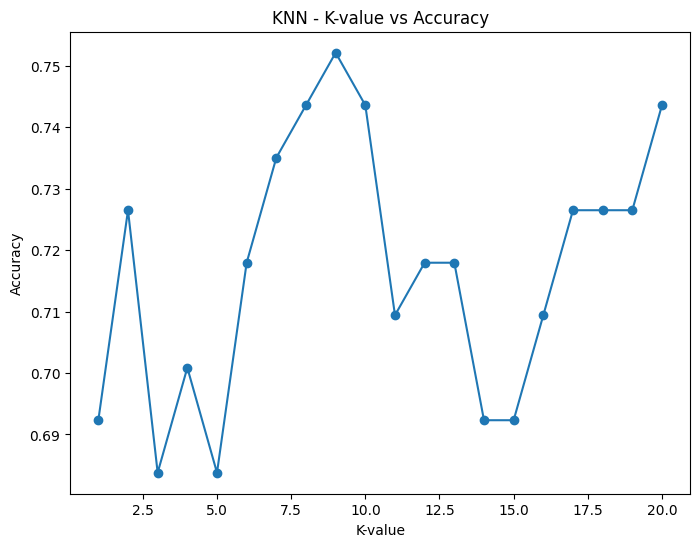

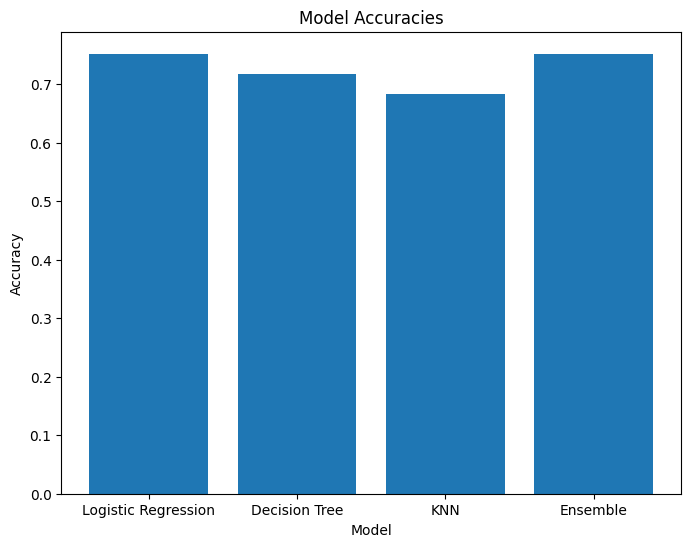

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize Logistic Regression model (Coefficients)
plt.figure(figsize=(8, 6))
plt.barh(X.columns, logistic_model.coef_[0])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression - Coefficients')
plt.show()

# Visualize Decision Tree model
plt.figure(figsize=(100, 100))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True)
plt.show()

# Visualize KNN model (K-value vs Accuracy)
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, knn_predictions))

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('KNN - K-value vs Accuracy')
plt.show()

# Visualize Ensemble model (Voting Classifier)
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Ensemble']
accuracies = [logistic_accuracy, decision_tree_accuracy, knn_accuracy, ensemble_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()